In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ssaba/OneDrive/Documents/Data Science and ML/Bootcamp/zomato_restaurants_in_India.csv")

In [3]:
df.shape

(211944, 26)

In [4]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [5]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [6]:
df.isna().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [7]:
df.cuisines.value_counts()

North Indian                                            15996
Fast Food                                                6721
Cafe                                                     6190
North Indian, Chinese                                    5820
South Indian                                             5217
                                                        ...  
North Indian, Chinese, Continental, Healthy Food            1
Mughlai, North Indian, Chinese, Continental, Italian        1
Burger, Rolls, Fast Food                                    1
Fast Food, Chinese, Burger                                  1
North Indian, Lucknowi, Chinese                             1
Name: cuisines, Length: 9382, dtype: int64

In [8]:
df2 = df.dropna(subset=["cuisines"])

In [9]:
df.address

0         Kalyani Point, Near Tulsi Cinema, Bypass Road,...
1               Main Market, Sadar Bazaar, Agra Cantt, Agra
2         62/1, Near Easy Day, West Shivaji Nagar, Goalp...
3         Near Anjana Cinema, Nehru Nagar, Civil Lines, ...
4               1C,3rd Floor, Fatehabad Road, Tajganj, Agra
                                ...                        
211939    Manu Smriti Complex, Near Navrachna School, GI...
211940    Mahalaxmi Apartment, Opposite B O B, Karoli Ba...
211941    3rd Floor, Shreem Shalini Mall, Opposite Conqu...
211942    G-2, Vedant Platina, Near Cosmos, Akota, Vadodara
211943    Shop 7, Ground Floor, Opposite Natubhai Circle...
Name: address, Length: 211944, dtype: object

In [10]:
df.locality

0            Khandari
1          Agra Cantt
2            Shahganj
3         Civil Lines
4             Tajganj
             ...     
211939      Fatehgunj
211940     Karelibaug
211941       Alkapuri
211942          Akota
211943       Vadiwadi
Name: locality, Length: 211944, dtype: object

In [11]:
df.address.iloc[2].split(",")[-1].strip()

'Shahganj'

In [14]:
valz = df['address'].apply(lambda x: x.split(",")[-1] if pd.notnull(x) else None)

In [15]:
valz

0              Agra
1              Agra
2          Shahganj
3              Agra
4              Agra
            ...    
211939     Vadodara
211940     Vadodara
211941     Vadodara
211942     Vadodara
211943     Vadodara
Name: address, Length: 211944, dtype: object

In [16]:
df['address'] = df['address'].fillna('Unknown')
df['zipcode'] = df['zipcode'].fillna('Unknown')
df['cuisines'] = df['cuisines'].fillna('Unknown')
df['timings'] = df['timings'].fillna('Unknown')
df['opentable_support'] = df['opentable_support'].fillna(0)
df['opentable_support'] = df['opentable_support'].astype(int)

In [17]:
df['last_locality'] = df['address'].apply(lambda x: x.split(",")[-1].strip() if pd.notnull(x) else None)
df['num_highlights'] = df['highlights'].apply(lambda x: len(x) if pd.notnull(x) else 0)

In [18]:
print("Descriptive Statistics:")
print(df.describe(include='all'))

Descriptive Statistics:
              res_id            name    establishment  \
count   2.119440e+05          211944           211944   
unique           NaN           41100               27   
top              NaN  Domino's Pizza  ['Quick Bites']   
freq             NaN            3108            64390   
mean    1.349411e+07             NaN              NaN   
std     7.883722e+06             NaN              NaN   
min     5.000000e+01             NaN              NaN   
25%     3.301027e+06             NaN              NaN   
50%     1.869573e+07             NaN              NaN   
75%     1.881297e+07             NaN              NaN   
max     1.915979e+07             NaN              NaN   

                                                      url  \
count                                              211944   
unique                                              55568   
top     https://www.zomato.com/chennai/3bs-buddies-bar...   
freq                                           

Distribution Analysis

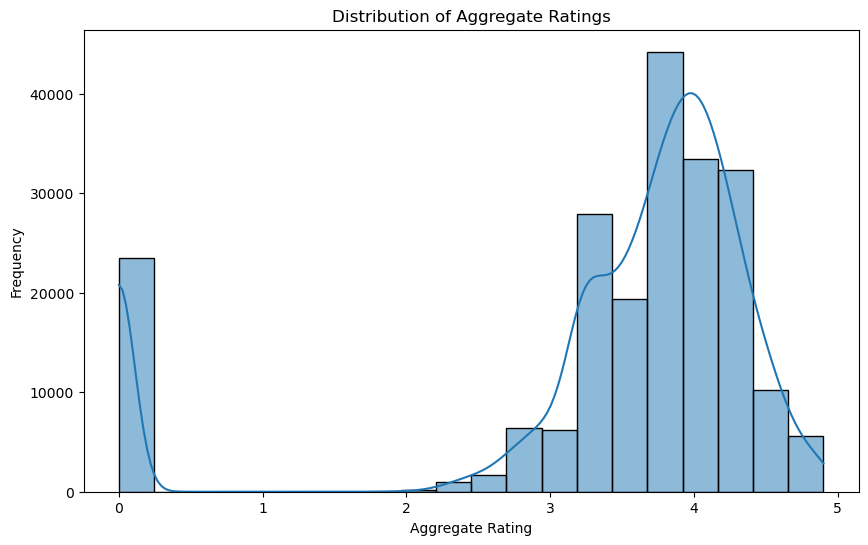

In [21]:
# checking the ratings' trend
plt.figure(figsize=(10, 6))
sns.histplot(df['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

In [54]:
df["price_range"].nunique()

4

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


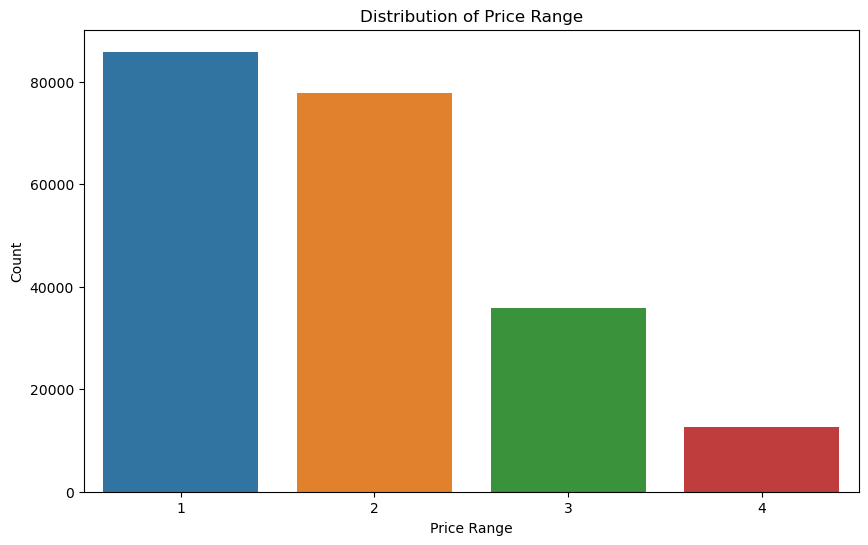

In [22]:
# Price Range disrtibtion 
plt.figure(figsize=(10, 6))
sns.countplot(df['price_range'])
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

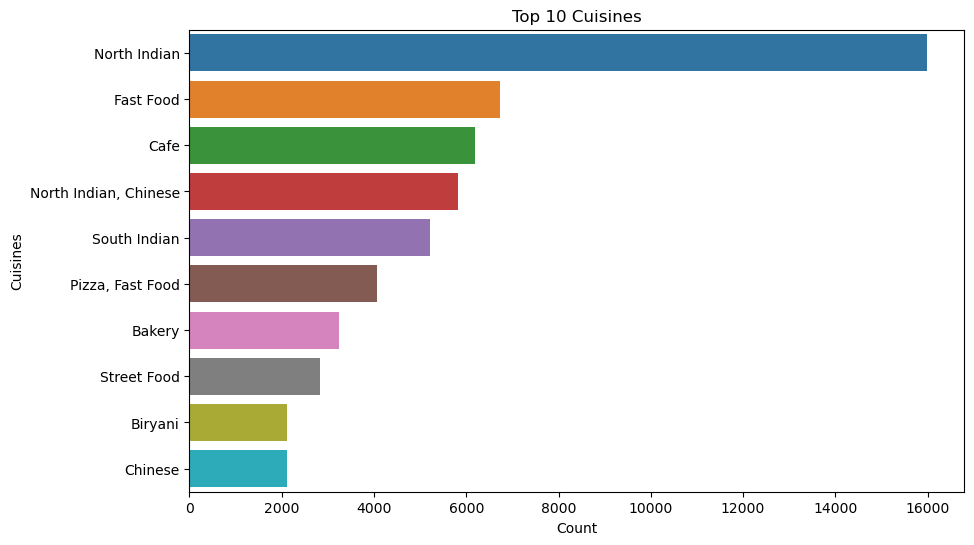

In [24]:
# finding the top 10 cuisines
plt.figure(figsize=(10, 6))
top_cuisines = df['cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

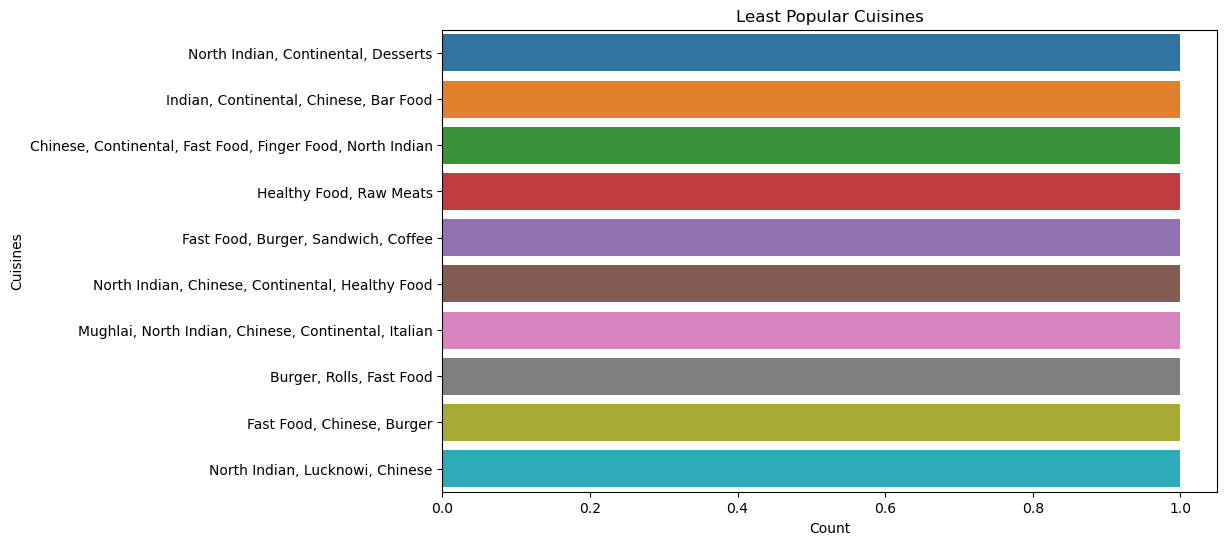

In [26]:
plt.figure(figsize=(10, 6))
least_popular = df['cuisines'].value_counts().tail(10)
sns.barplot(x=least_popular.values, y=least_popular.index)
plt.title('Least Popular Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

C:\Users\ssaba\AppData\Local\Temp\ipykernel_13916\102543907.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


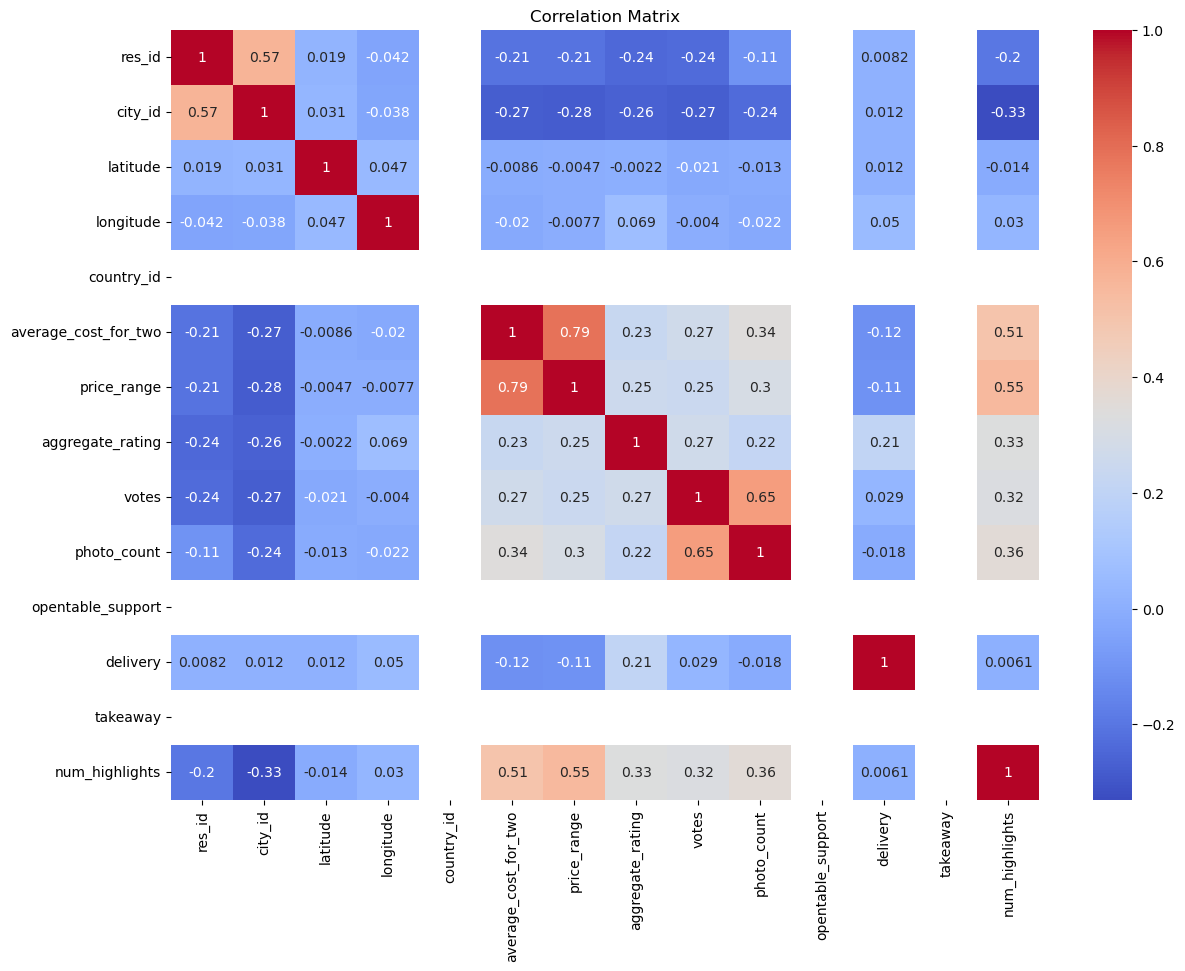

In [27]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Regional Analysis

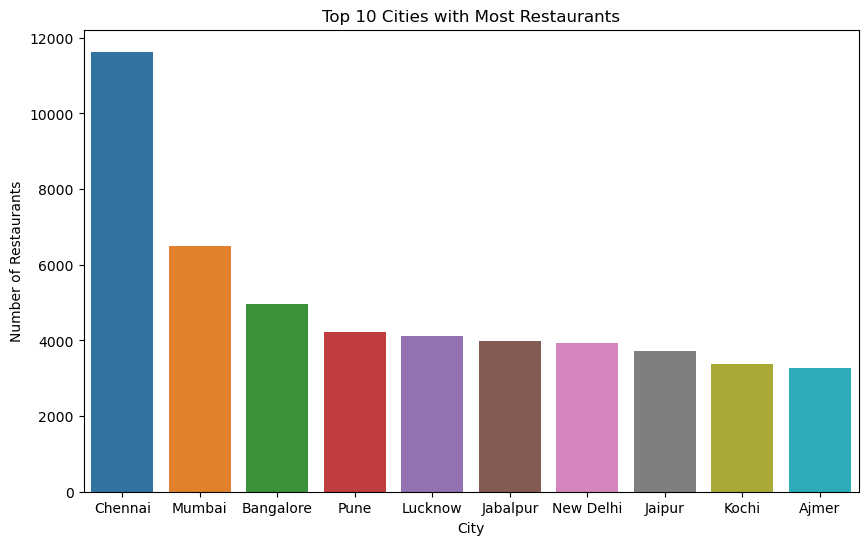

In [28]:
# Finding the regional distribitions 
city_counts = df['city'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

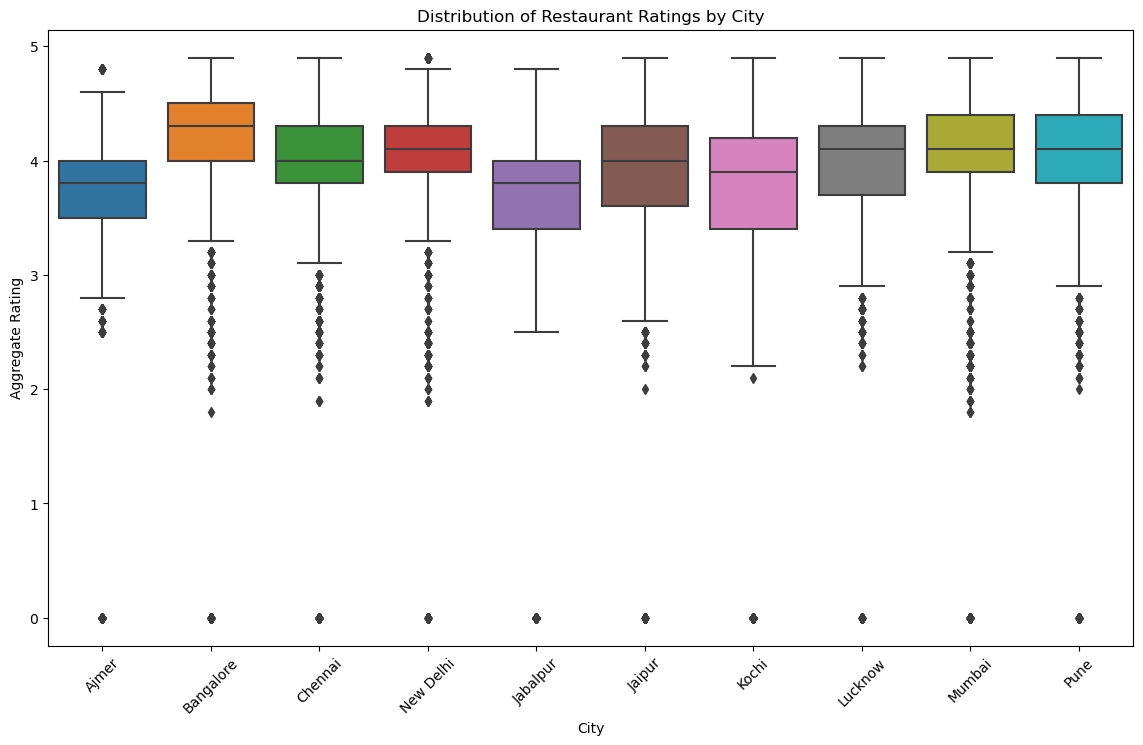

In [55]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='city', y='aggregate_rating', data=df[df['city'].isin(city_counts.index)])
plt.title('Distribution of Restaurant Ratings by City')
plt.xlabel('City')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

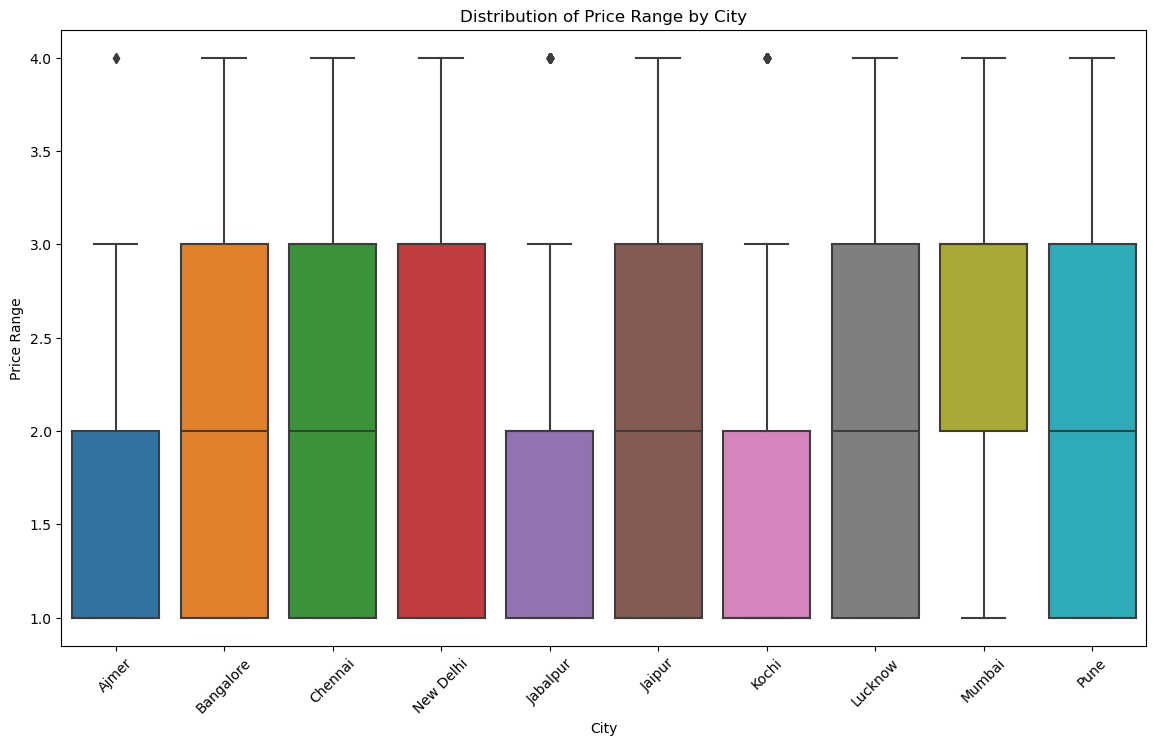

In [56]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='city', y='price_range', data=df[df['city'].isin(city_counts.index)])
plt.title('Distribution of Price Range by City')
plt.xlabel('City')
plt.ylabel('Price Range')
plt.xticks(rotation=45)
plt.show()

In [57]:
popular_cuisines_by_city = df[df['city'].isin(city_counts.index)].groupby('city')['cuisines'].apply(lambda x: x.value_counts().index[0])
print("Most Popular Cuisines by City:")
print(popular_cuisines_by_city)

Most Popular Cuisines by City:
city
Ajmer            North Indian
Bangalore        South Indian
Chennai          North Indian
Jabalpur         North Indian
Jaipur           North Indian
Kochi                  Bakery
Lucknow          North Indian
Mumbai       Bakery, Desserts
New Delhi        North Indian
Pune             North Indian
Name: cuisines, dtype: object


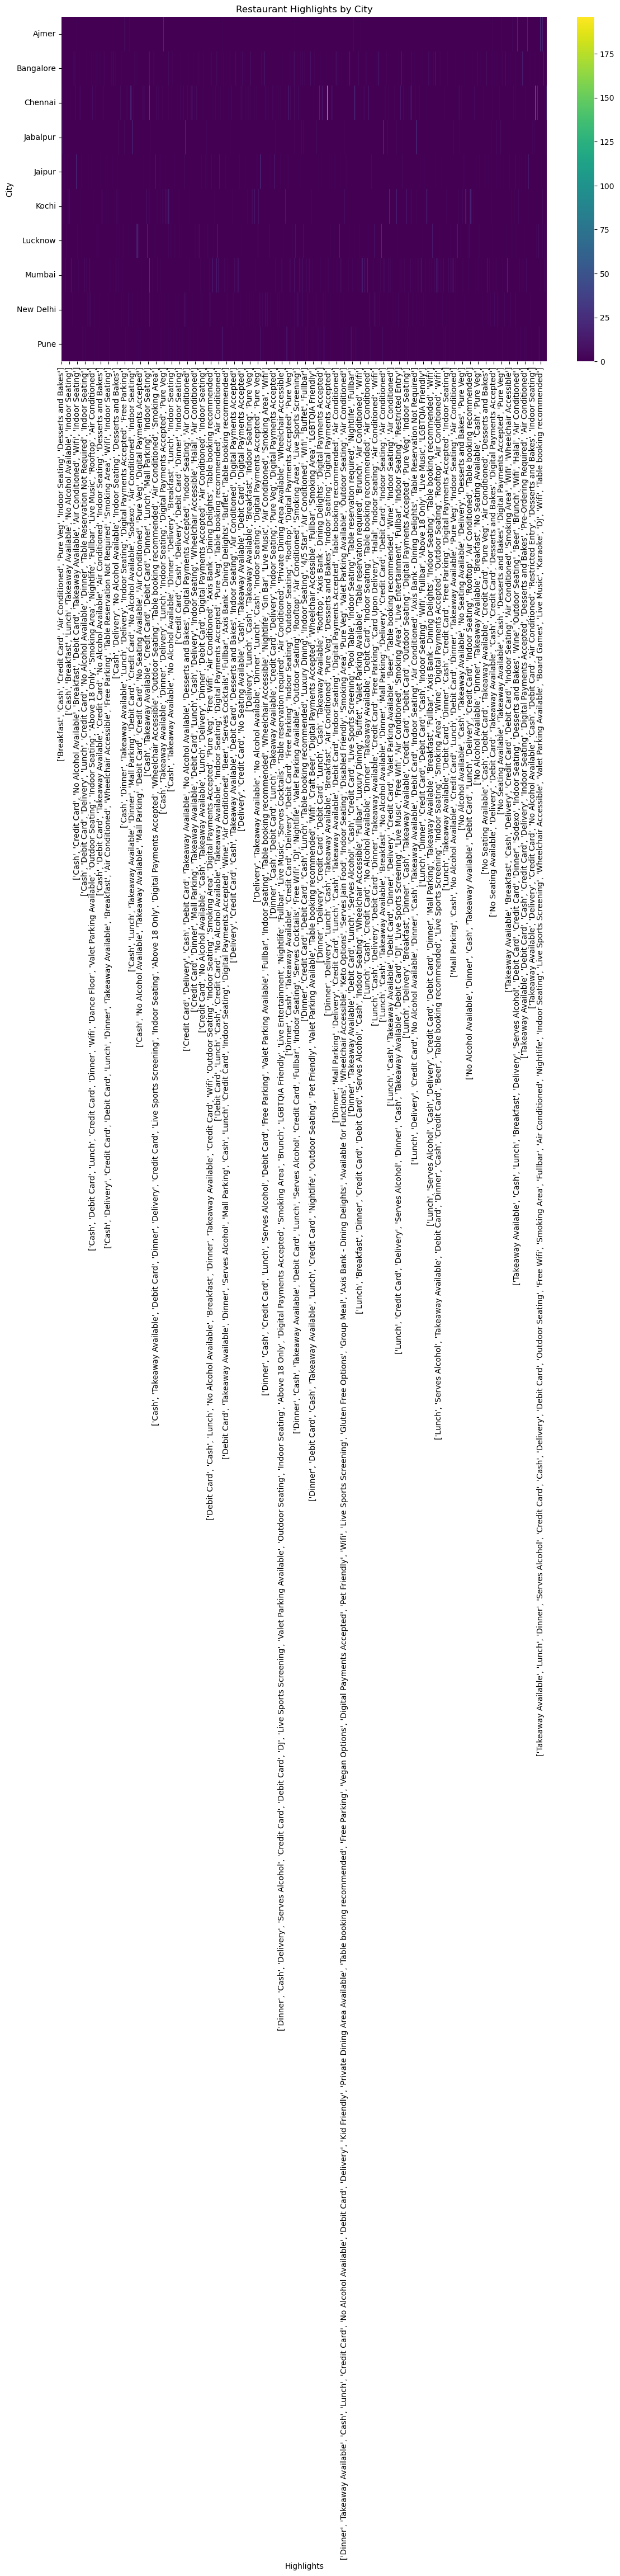

In [58]:
highlights_by_city = df[df['city'].isin(city_counts.index)].groupby(['city', 'highlights']).size().unstack().fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(highlights_by_city, cmap='viridis')
plt.title('Restaurant Highlights by City')
plt.xlabel('Highlights')
plt.ylabel('City')
plt.show()

In [65]:
df["highlights"].value_counts()

['Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']                                                                3352
['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takeaway Available', 'Indoor Seating']                                                    2491
[]                                                                                                                                 2069
['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Lunch', 'Delivery', 'Credit Card', 'Indoor Seating', 'Air Conditioned']    1200
['Lunch', 'Cash', 'Takeaway Available', 'No Alcohol Available', 'Dinner', 'Delivery', 'Indoor Seating']                            1071
                                                                                                                                   ... 
['Takeaway Available', 'Dinner', 'Cash', 'Delivery', 'Outdoor Seating', 'Digital Payments Accepted']                                  1
['Cash', 'Delivery', 'Takeaway Available', 'Outd

In [64]:
df[df["city"]=="Chennai"]["highlights"].value_counts()

['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Lunch', 'Delivery', 'Credit Card', 'Indoor Seating', 'Air Conditioned']                                                                                                                                                                                                                                                                                         178
['Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']                                                                                                                                                                                                                                                                                                                                                     166
['Credit Card', 'No Alcohol Available', 'Dinner', 'Delivery', 'Lunch', 'Cash', 'Debit Card', 'Takeaway Available', 'Table Reservation Not Required', 'Digital Payments Accepted'

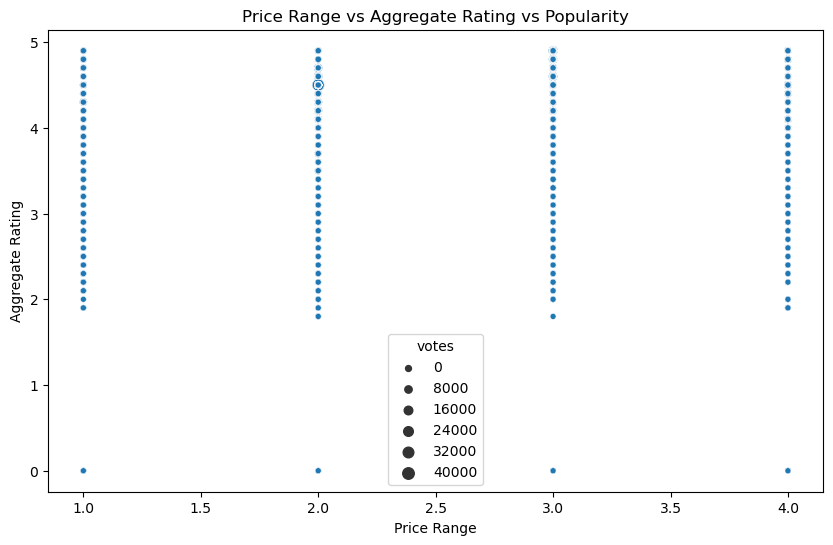

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_range', y='aggregate_rating', size='votes', data=df)
plt.title('Price Range vs Aggregate Rating vs Popularity')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

In [32]:
region_cuisines = df.groupby('last_locality')['cuisines'].value_counts().unstack().fillna(0)
top_cuisines_by_region = region_cuisines.apply(lambda x: x.nlargest(1).index[0], axis=1)

In [30]:
top_cuisines_by_region

last_locality
                                                                         Bakery
#36 phase-1 market near baba Chicken  dugri ludhiana               North Indian
( Uttarakhand )                                                    North Indian
(Adrash market ) Lucknow                                    Desserts, Beverages
(T.E.L.C. CHURCH COMPOUND) MADURAI -                               South Indian
                                                                 ...           
varanasi                                                         Chinese, Rolls
vesu surat                                                 Bubble Tea, Desserts
viman nagar pune 411014                                     Fast Food, Desserts
visakhapatnam                                           South Indian, Beverages
​Kolkata                                                       Italian, Mexican
Length: 2248, dtype: object

In [31]:
region_cuisines

cuisines,Afghan,"Afghan, American","Afghan, Arabian, BBQ, Beverages, Biryani, Maharashtrian","Afghan, Arabian, BBQ, Beverages, Burger","Afghan, Arabian, Biryani","Afghan, Arabian, Cafe","Afghan, Asian, BBQ, Chinese, Fast Food, Finger Food, Healthy Food, Himachali","Afghan, Bakery, Chinese","Afghan, Bakery, Desserts, Fast Food, Modern Indian, North Indian","Afghan, Beverages, Desserts",...,"Wraps, Salad, Healthy Food, Burger","Wraps, Sandwich, Beverages","Wraps, Sandwich, Desserts, Burger, Beverages","Wraps, Sandwich, Panini, Cafe, Bakery","Wraps, Sandwich, Panini, Indian, Desserts, Beverages","Wraps, Sandwich, Pizza, BBQ","Wraps, Sandwich, Pizza, Bakery","Wraps, Sandwich, Rolls, Fast Food, Burger","Wraps, Sandwich, Rolls, Pizza, Burger","Wraps, Sandwich, Salad, Pizza, Burger, Beverages"
last_locality,,,,,,,,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#36 phase-1 market near baba Chicken dugri ludhiana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
( Uttarakhand ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(Adrash market ) Lucknow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(T.E.L.C. CHURCH COMPOUND) MADURAI -,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
varanasi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vesu surat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
viman nagar pune 411014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
print("Top Cuisines by Region:")
print(top_cuisines_by_region.head(10))

Top Cuisines by Region:
last_locality
                                                                          Bakery
#36 phase-1 market near baba Chicken  dugri ludhiana                North Indian
( Uttarakhand )                                                     North Indian
(Adrash market ) Lucknow                                     Desserts, Beverages
(T.E.L.C. CHURCH COMPOUND) MADURAI -                                South Indian
- 171006                                                 North Indian, Fast Food
- 248001                                                        Fast Food, Rolls
- 721306                                                                 Chinese
1 Rehri Market Crystal Chowk Amritsar                                  Fast Food
1 Salai Road woraiyur                                   Desserts, Bakery, Mithai
dtype: object


Gap Analysis

In [69]:
city_price_range = df.groupby('city')['price_range'].value_counts().unstack().fillna(0)
top_priced_cities = city_price_range.apply(lambda x: x.nlargest(1).index[0], axis=1)
print(top_priced_cities.sort_values())

city
Agra           1
Navi Mumbai    1
Nainital       1
Mohali         1
Meerut         1
              ..
Gurgaon        3
Pune           3
Nashik         3
Puducherry     3
Goa            4
Length: 99, dtype: int64


In [78]:
city_by_rating = df.groupby('city')['aggregate_rating'].value_counts().unstack().fillna(0)
low_rated_cities = city_by_rating.apply(lambda x: x.nlargest(1).index[0], axis=1)

print(city_by_rating)

aggregate_rating     0.0  1.8  1.9  2.0  2.1  2.2  2.3   2.4   2.5   2.6  ...  \
city                                                                      ...   
Agra               258.0  0.0  0.0  0.0  0.0  2.0  5.0   6.0   3.0   9.0  ...   
Ahmedabad          169.0  0.0  0.0  0.0  2.0  0.0  4.0   6.0  16.0  40.0  ...   
Ajmer              179.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  24.0  16.0  ...   
Alappuzha         1475.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...   
Allahabad          164.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   3.0  11.0  ...   
...                  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...  ...   
Varanasi           103.0  0.0  0.0  0.0  0.0  0.0  3.0   5.0   5.0  10.0  ...   
Vellore            258.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  ...   
Vijayawada          85.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   6.0   6.0  ...   
Vizag               98.0  0.0  0.0  0.0  0.0  0.0  3.0  11.0   4.0  10.0  ...   
Zirakpur            29.0  0.

In [34]:
campaign_strategies = {
    'target_regions': top_cuisines_by_region.index.tolist(),
    'focus_cuisines': top_cuisines_by_region.values.tolist(),
    'promotions': ['Discounts', 'Loyalty Programs', 'Special Events']
}

In [35]:
campaign_strategies

{'target_regions': ['',
  '#36 phase-1 market near baba Chicken  dugri ludhiana',
  '( Uttarakhand )',
  '(Adrash market ) Lucknow',
  '(T.E.L.C. CHURCH COMPOUND) MADURAI -',
  '- 171006',
  '- 248001',
  '- 721306',
  '1 Rehri Market Crystal Chowk Amritsar',
  '1 Salai Road woraiyur',
  '1 Turner Road Clement Town Dehradun',
  '1.5km From Mall Road of Manali on Solang Valley Road',
  '10/14 Near Shiv Shankar Dairy',
  '100 feet road Dayalbagh Agra',
  '1033/1 A E ward opp. sterling tower Shahupuri kolhapur',
  '104 Sakchi SNP AREA Jamshedpur',
  '11/798a chandan nagar rambagh kamla nagar agra',
  '116 Industrial Area Phase 1',
  '1163 D ward Ganji Galli Guruwar Peth Kolhapur',
  '117/ N/ 62 raniganj kakadeo',
  '117/480 P Block Hitkari Nagar Near UCO Bank Kanpur  -208019',
  '117/N/77 AVON MARKET KAKADEO KANPUR 208025 \nNEAR INDUSIND BANK',
  '11th Avenue Ashok Nagar',
  '1214 Rajarampuri 2nd Lane Takala Near Nigade HOSPITAL',
  '123 New Colony Mall Road Opposite Rabindra Day Boarding

In [36]:
print("Proposed Marketing Campaign Strategies:")
print(campaign_strategies)

Proposed Marketing Campaign Strategies:
{'target_regions': ['', '#36 phase-1 market near baba Chicken  dugri ludhiana', '( Uttarakhand )', '(Adrash market ) Lucknow', '(T.E.L.C. CHURCH COMPOUND) MADURAI -', '- 171006', '- 248001', '- 721306', '1 Rehri Market Crystal Chowk Amritsar', '1 Salai Road woraiyur', '1 Turner Road Clement Town Dehradun', '1.5km From Mall Road of Manali on Solang Valley Road', '10/14 Near Shiv Shankar Dairy', '100 feet road Dayalbagh Agra', '1033/1 A E ward opp. sterling tower Shahupuri kolhapur', '104 Sakchi SNP AREA Jamshedpur', '11/798a chandan nagar rambagh kamla nagar agra', '116 Industrial Area Phase 1', '1163 D ward Ganji Galli Guruwar Peth Kolhapur', '117/ N/ 62 raniganj kakadeo', '117/480 P Block Hitkari Nagar Near UCO Bank Kanpur  -208019', '117/N/77 AVON MARKET KAKADEO KANPUR 208025 \nNEAR INDUSIND BANK', '11th Avenue Ashok Nagar', '1214 Rajarampuri 2nd Lane Takala Near Nigade HOSPITAL', '123 New Colony Mall Road Opposite Rabindra Day Boarding School 

In [37]:
competitors = df.groupby('city')['name'].value_counts().nlargest(5)

In [38]:
competitors

city     name                          
Chennai  Chili's American Grill & Bar      174
         3B's - Buddies, Bar & Barbecue    169
         SS Hyderabad Biryani              161
         Drizzle by the beach              156
         BFF 2.0                           154
Name: name, dtype: int64

In [46]:
competitors = df.groupby('city').apply(lambda x: x.nlargest(1, 'aggregate_rating'))
print("Major Competitors by City:")
print(competitors[['name', 'cuisines', 'price_range', 'aggregate_rating']])

Major Competitors by City:
                                          name  \
city                                             
Agra       4       The Salt Cafe Kitchen & Bar   
Ahmedabad  2688                     Buttercupp   
Ajmer      5936        Mango Masala Restaurant   
Alappuzha  9215                  Arabian Shake   
Allahabad  11147                        Eat On   
...                                        ...   
Varanasi   200188              Barbeque Nation   
Vellore    202609                 Hotel Surabi   
Vijayawada 204777        Milap's Punjabi Hotel   
Vizag      207026     AB's - Absolute Barbecue   
Zirakpur   30128                  Gourmet Nine   

                                                            cuisines  \
city                                                                   
Agra       4                      North Indian, Continental, Italian   
Ahmedabad  2688                                     Desserts, Bakery   
Ajmer      5936    Continental, Be

In [49]:
city_cuisines = df.groupby('city')['cuisines'].value_counts().unstack().fillna(0)
top_cuisines_by_city = city_cuisines.apply(lambda x: x.nlargest(1).index[0], axis=1)

In [45]:
top_cuisines_by_city

city
Agra          North Indian
Ahmedabad             Cafe
Ajmer         North Indian
Alappuzha           Kerala
Allahabad     North Indian
                  ...     
Varanasi      North Indian
Vellore       South Indian
Vijayawada    South Indian
Vizag         South Indian
Zirakpur      North Indian
Length: 99, dtype: object

In [39]:
city_characteristics = df.groupby('city').agg({
    'cuisines': lambda x: pd.Series.mode(x)[0],  
    'highlights': lambda x: pd.Series.mode(x)[0]  
})

In [40]:
city_characteristics

,cuisines,highlights
city,,
Agra,North Indian,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas..."
Ahmedabad,Cafe,"['Dinner', 'Delivery', 'Debit Card', 'Lunch', ..."
Ajmer,North Indian,"['Breakfast', 'Dinner', 'Takeaway Available', ..."
Alappuzha,Kerala,"['Lunch', 'Cash', 'Breakfast', 'No Alcohol Ava..."
Allahabad,North Indian,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea..."
...,...,...
Varanasi,North Indian,"['Lunch', 'Cash', 'Takeaway Available', 'No Al..."
Vellore,South Indian,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea..."
Vijayawada,South Indian,"['Lunch', 'Takeaway Available', 'Debit Card', ..."


In [79]:
campaign_strategies = {
    'target_regions': top_cuisines_by_city.index.tolist(),
    'focus_cuisines': top_cuisines_by_city.values.tolist(),
    'promotions': ['Discounts', 'Loyalty Programs', 'Special Events']
}
print("Proposed Marketing Campaign Strategies:")

# Suggest promotional tactics
promotional_tactics = [
    'Discounts for highly-rated restaurants',
    'Loyalty programs for frequent customers',
    'Special events for underrepresented cuisines'
]

summary_report = {
    'descriptive_stats': df.describe(include='all'),
    'correlation_matrix': correlation_matrix,
    'top_cuisines_by_region': top_cuisines_by_region,
    'campaign_strategies': campaign_strategies,
    'promotional_tactics': promotional_tactics
}
print("Summary Report:")
print(summary_report)

Proposed Marketing Campaign Strategies:
Summary Report:
{'descriptive_stats':               res_id            name    establishment  \
count   2.119440e+05          211944           211944   
unique           NaN           41100               27   
top              NaN  Domino's Pizza  ['Quick Bites']   
freq             NaN            3108            64390   
mean    1.349411e+07             NaN              NaN   
std     7.883722e+06             NaN              NaN   
min     5.000000e+01             NaN              NaN   
25%     3.301027e+06             NaN              NaN   
50%     1.869573e+07             NaN              NaN   
75%     1.881297e+07             NaN              NaN   
max     1.915979e+07             NaN              NaN   

                                                      url  \
count                                              211944   
unique                                              55568   
top     https://www.zomato.com/chennai/3bs-buddies-bar